# House Prices Competition : Term Project 

### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print ("Train data shape:", train.shape)

Train data shape: (1460, 81)


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
print ("Test data shape:", test.shape)


Test data shape: (1459, 80)


In [7]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

### Skewness of the data :

Skewness is a measure of the degree of asymmetry of a distribution. If the left tail (tail at small end of the distribution) is more pronounced than the right tail (tail at the large end of the distribution), the function is said to have negative skewness. If the reverse is true, it has positive skewness. If the two are equal, it has zero skewness.
The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

Skew is: 1.88287575977


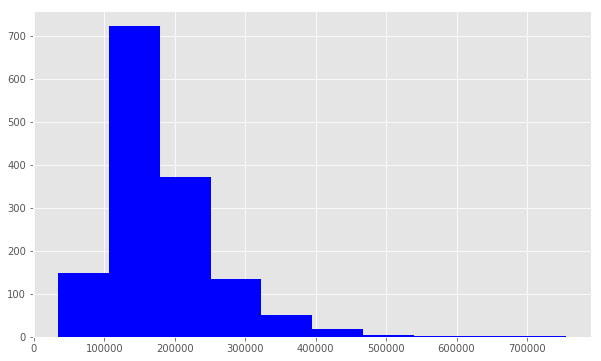

In [9]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

We apply log function to have zero skew 

Skew is: 0.121335062205


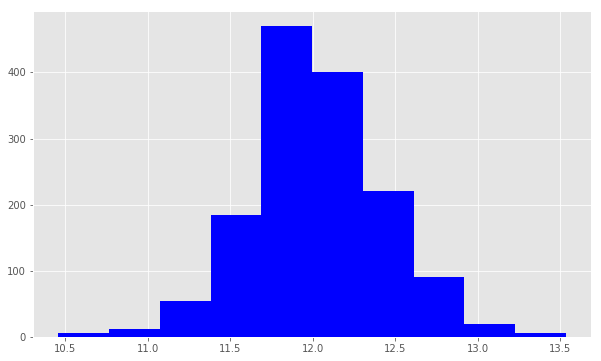

In [10]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

### Dealing with outliers:

#### Ground Living Area feature :

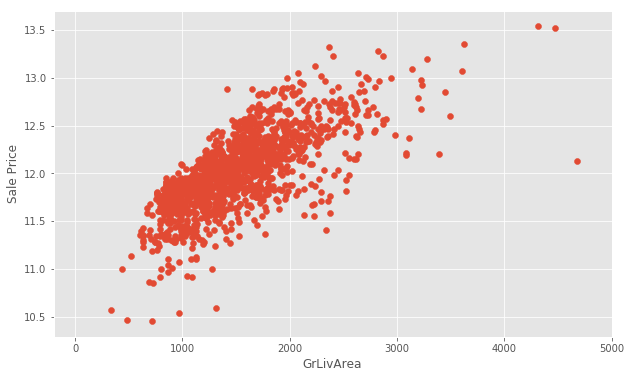

In [13]:
plt.scatter(x=train['GrLivArea'], y=np.log(train.SalePrice))
plt.xlim(-200,5000) # This forces the same scale as before

plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.show()

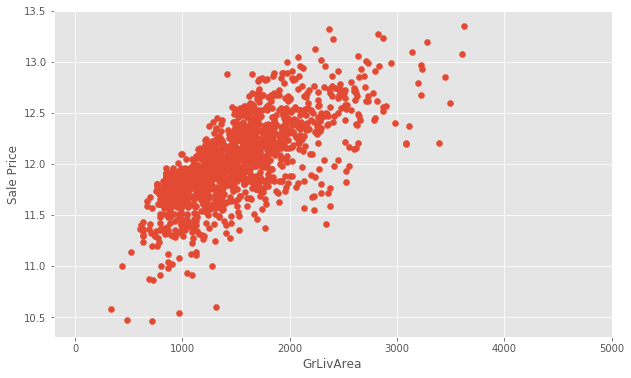

In [14]:
#Deleting outliers
train = train[train['GrLivArea'] < 4000] 

plt.scatter(x=train['GrLivArea'], y=np.log(train.SalePrice))
plt.xlim(-200,5000) # This forces the same scale as before

plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.show()

In [15]:
train.shape

(1456, 80)

#### GarageArea feature:

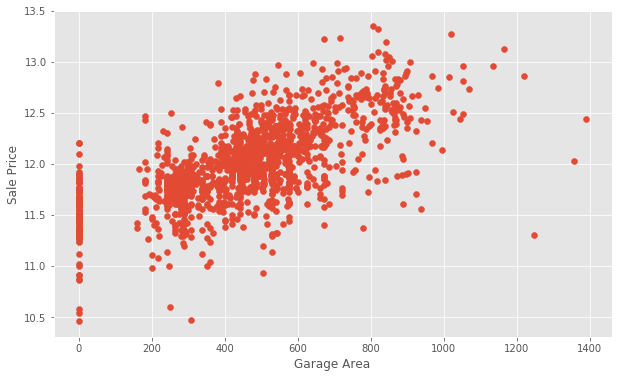

In [16]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [17]:
train = train[train['GarageArea'] < 1200]

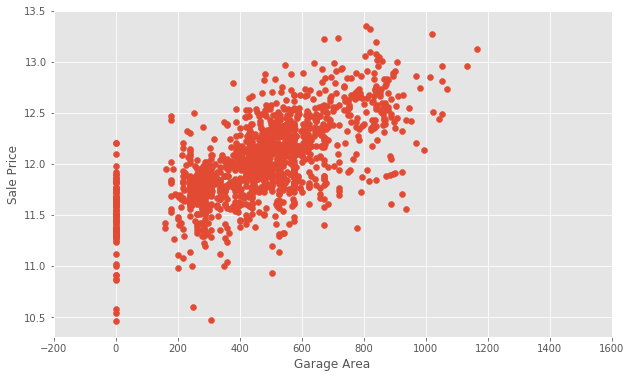

In [18]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [19]:
train.shape

(1452, 80)

### Feature engineering :

In [20]:
# we concatenate both train and test set

ntrain = train.shape[0]
ntest = test.shape[0]
ytrain_2 = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2911, 79)


### Numerical features :

In [21]:
integers = all_data.select_dtypes(include=[('int64')])
integers.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,EnclosedPorch,Fireplaces,FullBath,GrLivArea,HalfBath,KitchenAbvGr,...,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,0,0,2,1710,1,1,...,61,5,7,0,0,8,0,2003,2003,2008
1,1262,0,0,3,0,1,2,1262,0,1,...,0,8,6,0,0,6,298,1976,1976,2007
2,920,866,0,3,0,1,2,1786,1,1,...,42,5,7,0,0,6,0,2001,2002,2008
3,961,756,0,3,272,1,1,1717,0,1,...,35,5,7,0,0,7,0,1915,1970,2006
4,1145,1053,0,4,0,1,2,2198,1,1,...,84,5,8,0,0,9,192,2000,2000,2008
5,796,566,320,1,0,0,1,1362,1,1,...,30,5,5,0,0,5,40,1993,1995,2009
6,1694,0,0,3,0,1,2,1694,0,1,...,57,5,8,0,0,7,255,2004,2005,2007
7,1107,983,0,3,228,2,2,2090,1,1,...,204,6,7,0,0,7,235,1973,1973,2009
8,1022,752,0,2,205,2,2,1774,0,2,...,0,5,7,0,0,8,90,1931,1950,2008
9,1077,0,0,2,0,2,1,1077,0,2,...,4,6,5,0,0,5,0,1939,1950,2008


In [22]:
floats = all_data.select_dtypes(include=[('float64')])
floats.head()

,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,GarageArea,GarageCars,GarageYrBlt,LotFrontage,MasVnrArea,TotalBsmtSF
0,706.0,0.0,1.0,0.0,150.0,548.0,2.0,2003.0,65.0,196.0,856.0
1,978.0,0.0,0.0,1.0,284.0,460.0,2.0,1976.0,80.0,0.0,1262.0
2,486.0,0.0,1.0,0.0,434.0,608.0,2.0,2001.0,68.0,162.0,920.0
3,216.0,0.0,1.0,0.0,540.0,642.0,3.0,1998.0,60.0,0.0,756.0
4,655.0,0.0,1.0,0.0,490.0,836.0,3.0,2000.0,84.0,350.0,1145.0


### tranforming features represented in years to durations
- YearBuilt
- YearRemodAdd
- GarageYrBlt

In [23]:
all_data['YearBuiltDur'] = 2018 - all_data['YearBuilt']
all_data['YearRemodAddDur'] = 2018 - all_data['YearRemodAdd']
all_data['GarageYrBltDur'] = 2018 - all_data['GarageYrBlt']

In [24]:
all_data[['YearBuiltDur','YearRemodAddDur','GarageYrBltDur','YearBuilt','YearRemodAdd','GarageYrBlt']].head(6)

,YearBuiltDur,YearRemodAddDur,GarageYrBltDur,YearBuilt,YearRemodAdd,GarageYrBlt
0,15,15,15.0,2003,2003,2003.0
1,42,42,42.0,1976,1976,1976.0
2,17,16,17.0,2001,2002,2001.0
3,103,48,20.0,1915,1970,1998.0
4,18,18,18.0,2000,2000,2000.0
5,25,23,25.0,1993,1995,1993.0


### Binarizing some features:
- central air conditionning 
- poolquality (we can drop it)
- FireplaceQu: Fireplace quality
- miscfeature
- alley
- Fence
- BsmtHalfBath
- HalfBath


In [25]:
#Central Air
def encode(x): return 1 if x == 'Y' else 0
all_data.CentralAir = all_data.CentralAir.apply(encode)

In [26]:
#Pool Quality
l = ['Ex', 'Fa', 'Gd']
def encode(x): return 1 if x in l else 0
all_data.PoolQC = all_data.PoolQC.apply(encode)

In [27]:
#FireplaceQu
l = ['TA', 'Gd', 'Fa', 'Ex', 'Po']
def encode(x): return 1 if x in l else 0
all_data.FireplaceQu = all_data.FireplaceQu.apply(encode)
#all_data.FireplaceQu.value_counts()

In [28]:
#
l = ['Shed', 'Gar2', 'Othr', 'TenC']
def encode(x): return 1 if x in l else 0
all_data.MiscFeature = all_data.MiscFeature.apply(encode)
#all_data.MiscFeature.value_counts()

In [29]:
l = ['Grvl', 'Pave']
def encode(x): return 1 if x in l else 0
all_data.Alley = all_data.Alley.apply(encode)
all_data.Alley.value_counts()

0    2713
1     198
Name: Alley, dtype: int64

In [30]:
def encode(x): return 0 if x == 0  else 1
all_data.Fence = all_data.Fence.apply(encode)
#all_data.Fence.value_counts()

In [31]:
l = [ 1.,   2.]
def encode(x): return 1 if x in l else 0
all_data.BsmtHalfBath = all_data.BsmtHalfBath.apply(encode)
#all_data.BsmtHalfBath.value_counts()

In [32]:
l = [1,2]
def encode(x): return 1 if x in l else 0
all_data.HalfBath = all_data.HalfBath.apply(encode)
all_data.HalfBath.value_counts()

0    1831
1    1080
Name: HalfBath, dtype: int64

### Handling non-numerical features :

Features like Basement type, having null value means there is no basement, this is why we should fill it with zeros

In [33]:
# features of basement and garage that haas null values means there is no bsement
#get all features
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','GarageType', 'BsmtFinSF1', 'BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','GarageFinish',
            'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath','BsmtFinType2','BsmtFinType1','GarageQual',
            'GarageCond'):
    all_data[col] = all_data[col].fillna(0)

In [34]:
all_data.shape

(2911, 82)

let's discover the _utilities_ feature

In [35]:
all_data['Utilities'].unique()

array(['AllPub', 'NoSeWa', nan], dtype=object)

In [36]:
all_data['Utilities'].value_counts()

AllPub    2908
NoSeWa       1
Name: Utilities, dtype: int64

We see that mostly all our data sample have AllPub value, this is why this feature is not very usefull for our model, se we drop it

In [37]:
all_data = all_data.drop(['Utilities'], axis=1)

for Functional feature, data description says null value means typical
Functional: Home functionality (Assume typical unless deductions are warranted)



In [38]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [39]:
all_data.shape

(2911, 81)

In [40]:
all_data["Electrical"] = all_data["Electrical"].fillna('None')
all_data.shape

(2911, 81)

In [41]:
categoricals = all_data.select_dtypes(exclude=[np.number])
categoricals.head()

,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,Condition1,Condition2,Electrical,ExterCond,...,LotShape,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street
0,1Fam,TA,No,GLQ,Unf,Gd,Norm,Norm,SBrkr,TA,...,Reg,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave
1,1Fam,TA,Gd,ALQ,Unf,Gd,Feedr,Norm,SBrkr,TA,...,Reg,RL,None,Veenker,Y,CompShg,Gable,Normal,WD,Pave
2,1Fam,TA,Mn,GLQ,Unf,Gd,Norm,Norm,SBrkr,TA,...,IR1,RL,BrkFace,CollgCr,Y,CompShg,Gable,Normal,WD,Pave
3,1Fam,Gd,No,ALQ,Unf,TA,Norm,Norm,SBrkr,TA,...,IR1,RL,None,Crawfor,Y,CompShg,Gable,Abnorml,WD,Pave
4,1Fam,TA,Av,GLQ,Unf,Gd,Norm,Norm,SBrkr,TA,...,IR1,RL,BrkFace,NoRidge,Y,CompShg,Gable,Normal,WD,Pave


In [44]:
# we can add a feature of the total area of the house 
all_data['TotalSurface'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Null values :

In [45]:
nulls = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
LotFrontage,485
GarageYrBltDur,159
MasVnrType,24
MasVnrArea,23
MSZoning,4
SaleType,1
Exterior1st,1
KitchenQual,1
Exterior2nd,1


In [46]:
all_data = all_data.fillna(0)

In [47]:
nulls = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
TotalSurface,0
EnclosedPorch,0
ExterQual,0
Exterior1st,0
Exterior2nd,0
Fence,0
FireplaceQu,0
Fireplaces,0
Foundation,0


### Normalization :

In [48]:
numericals = pd.concat([integers, floats], axis=1)
numericals.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,EnclosedPorch,Fireplaces,FullBath,GrLivArea,HalfBath,KitchenAbvGr,...,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,GarageArea,GarageCars,GarageYrBlt,LotFrontage,MasVnrArea,TotalBsmtSF
0,856,854,0,3,0,0,2,1710,1,1,...,0.0,1.0,0.0,150.0,548.0,2.0,2003.0,65.0,196.0,856.0
1,1262,0,0,3,0,1,2,1262,0,1,...,0.0,0.0,1.0,284.0,460.0,2.0,1976.0,80.0,0.0,1262.0
2,920,866,0,3,0,1,2,1786,1,1,...,0.0,1.0,0.0,434.0,608.0,2.0,2001.0,68.0,162.0,920.0
3,961,756,0,3,272,1,1,1717,0,1,...,0.0,1.0,0.0,540.0,642.0,3.0,1998.0,60.0,0.0,756.0
4,1145,1053,0,4,0,1,2,2198,1,1,...,0.0,1.0,0.0,490.0,836.0,3.0,2000.0,84.0,350.0,1145.0


### Using min max scaler:

In [49]:
from sklearn.preprocessing import MinMaxScaler

num_columns = numericals.columns.values.tolist()

scaler = MinMaxScaler()
all_data.loc[:,num_columns] = scaler.fit_transform(all_data[num_columns])

all_data[num_columns].head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,EnclosedPorch,Fireplaces,FullBath,GrLivArea,HalfBath,KitchenAbvGr,...,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,GarageArea,GarageCars,GarageYrBlt,LotFrontage,MasVnrArea,TotalBsmtSF
0,0.109641,0.458647,0.0,0.375,0.000000,0.00,0.50,0.289015,1.0,0.333333,...,0.0,0.333333,0.0,0.064212,0.368280,0.4,0.907567,0.207668,0.12250,0.168008
1,0.194917,0.000000,0.0,0.375,0.000000,0.25,0.50,0.194917,0.0,0.333333,...,0.0,0.000000,1.0,0.121575,0.309140,0.4,0.895333,0.255591,0.00000,0.247694
2,0.123083,0.465091,0.0,0.375,0.000000,0.25,0.50,0.304978,1.0,0.333333,...,0.0,0.333333,0.0,0.185788,0.408602,0.4,0.906661,0.217252,0.10125,0.180569
3,0.131695,0.406015,0.0,0.375,0.268775,0.25,0.25,0.290485,0.0,0.333333,...,0.0,0.333333,0.0,0.231164,0.431452,0.6,0.905301,0.191693,0.00000,0.148381
4,0.170342,0.565521,0.0,0.500,0.000000,0.25,0.50,0.391514,1.0,0.333333,...,0.0,0.333333,0.0,0.209760,0.561828,0.6,0.906208,0.268371,0.21875,0.224730


In [50]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,YearBuiltDur,YearRemodAddDur,GarageYrBltDur,TotalSurface
0,0.109641,0.458647,0.0,0,0.375,1Fam,TA,No,0.176060,0.0,...,0.461538,0.168008,0.000000,0.949275,0.883333,0.50,15,15,15.0,2566.0
1,0.194917,0.000000,0.0,0,0.375,1Fam,TA,Gd,0.243890,0.0,...,0.307692,0.247694,0.209270,0.753623,0.433333,0.25,42,42,42.0,2524.0
2,0.123083,0.465091,0.0,0,0.375,1Fam,TA,Mn,0.121197,0.0,...,0.307692,0.180569,0.000000,0.934783,0.866667,0.50,17,16,17.0,2706.0
3,0.131695,0.406015,0.0,0,0.375,1Fam,Gd,No,0.053865,0.0,...,0.384615,0.148381,0.000000,0.311594,0.333333,0.00,103,48,20.0,2473.0
4,0.170342,0.565521,0.0,0,0.500,1Fam,TA,Av,0.163342,0.0,...,0.538462,0.224730,0.134831,0.927536,0.833333,0.50,18,18,18.0,3343.0


In [51]:
all_data = pd.get_dummies(all_data)
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave
0,0.109641,0.458647,0.0,0,0.375,0.176060,0.0,0.333333,0.0,0.064212,...,0,0,0,0,0,0,0,1,0,1
1,0.194917,0.000000,0.0,0,0.375,0.243890,0.0,0.000000,1.0,0.121575,...,0,0,0,0,0,0,0,1,0,1
2,0.123083,0.465091,0.0,0,0.375,0.121197,0.0,0.333333,0.0,0.185788,...,0,0,0,0,0,0,0,1,0,1
3,0.131695,0.406015,0.0,0,0.375,0.053865,0.0,0.333333,0.0,0.231164,...,0,0,0,0,0,0,0,1,0,1
4,0.170342,0.565521,0.0,0,0.500,0.163342,0.0,0.333333,0.0,0.209760,...,0,0,0,0,0,0,0,1,0,1


In [54]:
target = pd.DataFrame(ytrain_2, columns=['SalePrice']) 

In [55]:
train_set_2 = all_data[:ntrain]
test_set_2 = all_data[ntrain:]
#train_set_1 = pd.concat([train_set_1,target], axis=1)

In [56]:
#save train set
%store train_set_2
train_set_2.head()

Stored 'train_set_2' (DataFrame)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave
0,0.109641,0.458647,0.0,0,0.375,0.176060,0.0,0.333333,0.0,0.064212,...,0,0,0,0,0,0,0,1,0,1
1,0.194917,0.000000,0.0,0,0.375,0.243890,0.0,0.000000,1.0,0.121575,...,0,0,0,0,0,0,0,1,0,1
2,0.123083,0.465091,0.0,0,0.375,0.121197,0.0,0.333333,0.0,0.185788,...,0,0,0,0,0,0,0,1,0,1
3,0.131695,0.406015,0.0,0,0.375,0.053865,0.0,0.333333,0.0,0.231164,...,0,0,0,0,0,0,0,1,0,1
4,0.170342,0.565521,0.0,0,0.500,0.163342,0.0,0.333333,0.0,0.209760,...,0,0,0,0,0,0,0,1,0,1


In [57]:
#save test set
%store test_set_2
test_set_2.shape

Stored 'test_set_2' (DataFrame)


(1459, 291)

In [58]:
#save ytrain
%store ytrain_2
ytrain_2

Stored 'ytrain_2' (ndarray)


array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)